<a href="https://colab.research.google.com/github/likeshd/time_series_models_libraries/blob/main/basic_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 5
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

print(X)
print(y)
print(X.shape)

[[110 125 133 146 158]
 [125 133 146 158 172]
 [133 146 158 172 187]
 [146 158 172 187 196]]
[172 187 196 210]
(4, 5)


In [4]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape)

(4, 5, 1)


In [5]:
# Building LSTM Model
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)


Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 33125.6641
Epoch 2/300
1/1 [==============================] - 0s 16ms/step - loss: 31850.8262
Epoch 3/300
1/1 [==============================] - 0s 17ms/step - loss: 30888.2656
Epoch 4/300
1/1 [==============================] - 0s 16ms/step - loss: 29864.5703
Epoch 5/300
1/1 [==============================] - 0s 17ms/step - loss: 28700.3809
Epoch 6/300
1/1 [==============================] - 0s 14ms/step - loss: 27412.9375
Epoch 7/300
1/1 [==============================] - 0s 15ms/step - loss: 26437.2617
Epoch 8/300
1/1 [==============================] - 0s 16ms/step - loss: 25687.1484
Epoch 9/300
1/1 [==============================] - 0s 16ms/step - loss: 24873.1914
Epoch 10/300
1/1 [==============================] - 0s 14ms/step - loss: 23966.3496
Epoch 11/300
1/1 [==============================] - 0s 14ms/step - loss: 22968.9141
Epoch 12/300
1/1 [==============================] - 0s 16ms/step - loss: 21898.1211
Epo

In [6]:
# Predicting For the next 10 data
# demonstrate prediction for next 10 days
x_input = np.array([158,172, 187, 196, 210])
temp_input = list(x_input)
lst_output = []
i = 0
while (i < 10):

    if (len(temp_input) > 5):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        # print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        # print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        # print(temp_input)
        lst_output.append(yhat[0][0])
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i = i + 1

print(lst_output)

[222.7552]
1 day input [172.         187.         196.         210.         222.75520325]
1 day output [[235.14732]]
2 day input [187.         196.         210.         222.75520325 235.14732361]
2 day output [[252.49928]]
3 day input [196.         210.         222.75520325 235.14732361 252.49928284]
3 day output [[264.44818]]
4 day input [210.         222.75520325 235.14732361 252.49928284 264.44818115]
4 day output [[280.56543]]
5 day input [222.7552  235.14732 252.49928 264.44818 280.56543]
5 day output [[298.32086]]
6 day input [235.14732 252.49928 264.44818 280.56543 298.32086]
6 day output [[313.35663]]
7 day input [252.49928 264.44818 280.56543 298.32086 313.35663]
7 day output [[334.5571]]
8 day input [264.44818 280.56543 298.32086 313.35663 334.5571 ]
8 day output [[352.0916]]
9 day input [280.56543 298.32086 313.35663 334.5571  352.0916 ]
9 day output [[371.65915]]
[222.7552, 235.14732, 252.49928, 264.44818, 280.56543, 298.32086, 313.35663, 334.5571, 352.0916, 371.65915]


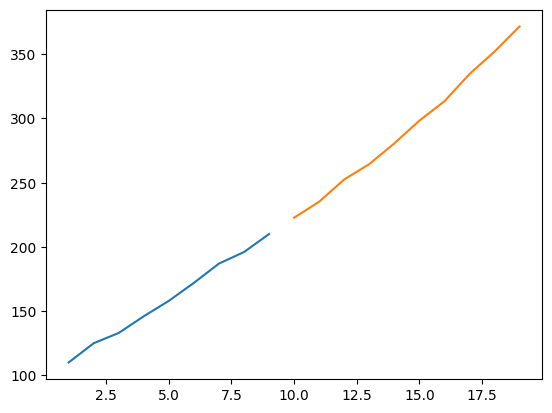

Done


In [7]:
# Visualizaing The Output

import matplotlib.pyplot as plt
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)
plt.show()
print("Done")